ref. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [3]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2', 'PC 3'])

In [4]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

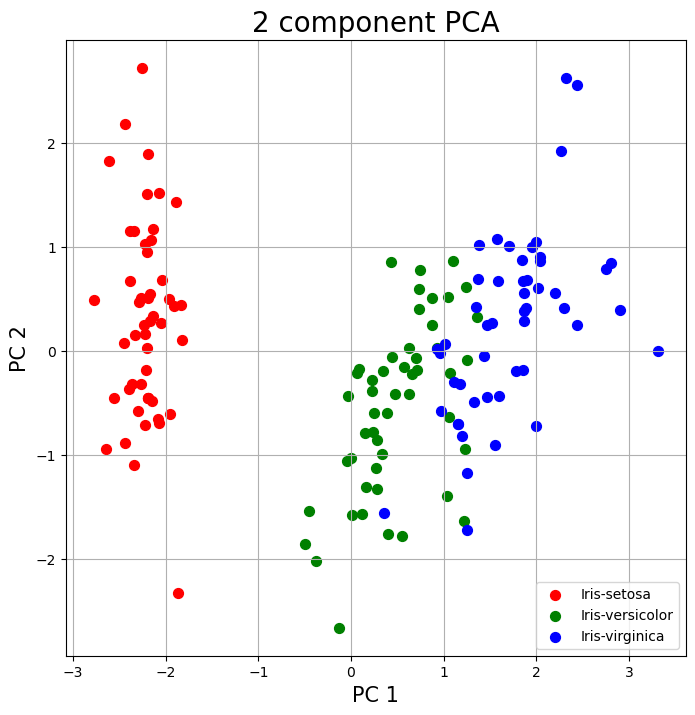

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1'], finalDf.loc[indicesToKeep, 'PC 2'], 
               c = color, s = 50)

ax.legend(targets)
ax.grid()

In [6]:
print(pca.explained_variance_ratio_)
print(f"PC 1       : {pca.explained_variance_ratio_[0] * 100:.2f}")
print(f"PC 2       : {pca.explained_variance_ratio_[1] * 100:.2f}")
print(f"PC SUM     : {sum(pca.explained_variance_ratio_) * 100:.2f}")

[0.72770452 0.23030523 0.03683832]
PC 1       : 72.77
PC 2       : 23.03
PC SUM     : 99.48
